<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_4_lesson/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тензор

Tensor - це багатовимірний масив даних в PyTorch. Він схожий на
Numpy array, але має ряд ключових відмінностей:

* **Підтримка GPU:** Тензори PyTorch можуть
    використовуватися на GPU
    для прискорення обчислень,
    що недоступно в Numpy.
* **Градієнти:** Тензори PyTorch
    підтримують градієнти,
    що робить їх зручними
    для використання в
    нейронних мережах.

# Створення тензорів

In [1]:
import torch
import numpy as np

**З списків:**

In [12]:
array = np.array([[1, 2, 3],
                  [4, 5, 6]])

print(array.shape)
print(array.dtype)

(2, 3)
int64


In [16]:
tensor = torch.tensor([[1, 2, 3],
                        [4, 5, 6]])

print(tensor)
print(tensor.shape)
print(tensor.dtype)

print(tensor.device) # процесор на якому відбуваються обчислення
print(tensor.requires_grad)  # чи рахувати градієнти

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.int64
cpu
False


**З функцій:**

In [17]:
tensor_c = torch.randn(5)
tensor_d = torch.zeros(2, 2)
tensor_e = torch.ones(4)

print(f'rand {tensor_c}\n')
print(f'zero {tensor_d}\n')
print(f'one {tensor_e}\n')

rand tensor([ 0.0533,  0.3954, -2.9500,  2.1675,  1.7751])

zero tensor([[0., 0.],
        [0., 0.]])

one tensor([1., 1., 1., 1.])



# Індексування тензорів

In [22]:
tensor = torch.tensor([[1, 2, 3],
                        [4, 5, 6]])

element = tensor[1, 0]


print(tensor[0])  # рядок з індексом 0

print(tensor[:, 1]) # стовпчик з індексом 1

print(tensor[1, 0])  # елемент 4

print(tensor[1, 1:])  # фрагмент [5, 6]

tensor([1, 2, 3])
tensor([2, 5])
tensor(4)
tensor([5, 6])


**1. `item()`:**

* Використовується для **отримання** **значення**
    з **скалярного тензора**(тобто просто число).
* **Не** використовується для тензорів
    з **більшою розмірністю**,
    тому що призведе до помилки.


In [26]:
element.shape

torch.Size([])

In [25]:
# element[0] # error

element.item()

4

In [27]:
tensor = torch.tensor([1, 2, 3])
tensor.item()

RuntimeError: a Tensor with 3 elements cannot be converted to Scalar

In [28]:
tensor = torch.tensor([[1]])
tensor.item()

1

**2. `numpy()`:**

* Використовується для **перетворення**
    тензора PyTorch в **Numpy array**.
* Може використовуватися для тензорів
    **з будь-якою розмірністю**.

In [29]:
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [30]:
tensor.numpy()

array([1, 2, 3])

#Арифметичні операції та функції

In [35]:
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])


tensor_a + tensor_b


tensor([5, 7, 9])

#Зміна розмірів

**`view`:** Зміна розміру тензора без зміни його даних.

Використовувати по можливості, якщо виникатимуть помилки, то використати `reshape`

In [36]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor)


tensor([[1, 2, 3],
        [4, 5, 6]])


In [44]:
tensor.view(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

**`reshape`:** Зміна розміру тензора з можливістю зміни його даних.

Згідно документації, коли можливо створює `view`

In [45]:
tensor.reshape(3, -1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [46]:
tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [49]:
tensor.sum()

tensor(21)

In [51]:
# сума кожного рядка
# (2, 3) -> (2)

tensor.sum(dim=1) # те ж саме що й axis

tensor([ 6, 15])

In [54]:
tensor.max(dim=0)

torch.return_types.max(
values=tensor([4, 5, 6]),
indices=tensor([1, 1, 1]))

# Конкатенація тензорів

**`torch.cat`:** З'єднує тензори по заданій розмірності

роль `axis` з numpy тут виконує параметр `dim`

In [55]:
tensor1 = torch.tensor([[1, 2, 3],
                        [4, 5, 6]])

tensor2 = torch.tensor([[10, 20, 30],
                        [40, 5, 60]])

In [56]:
tensors = [tensor1, tensor2]  # список тензорів на об'єднання

torch.cat(tensors, dim=0)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [10, 20, 30],
        [40, 50, 60]])

In [57]:
torch.cat(tensors, dim=1)

tensor([[ 1,  2,  3, 10, 20, 30],
        [ 4,  5,  6, 40, 50, 60]])

# Device

**Device** в PyTorch - це абстракція,
що використовується для опису
**місця розташування** даних
тензора. Це може бути **CPU**
або **GPU**.

## Перегляд інформації про device:

* `torch.cuda.is_available()`:
    Перевіряє, чи доступний
    GPU.
* `torch.cuda.device_count()`:
    Отримує кількість
    доступних GPU.
* `torch.cuda.get_device_name(device)`:
    Отримує назву
    конкретного GPU.
* `.device`: Атрибут тензора,
    що показує, на
    якому device він
    розташований.

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.get_device_name('cuda')

'Tesla T4'

In [5]:
device_name = 'cuda' if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

device

device(type='cuda')

## Підключення тензора до device

* `.to(device)`: Переміщує
    тензор на
    заданий device.

In [6]:
tensor = torch.tensor([1, 2, 3])
tensor.device

device(type='cpu')

In [9]:
tensor = tensor.to(device)

In [11]:
tensor

tensor([1, 2, 3], device='cuda:0')

In [13]:
res = tensor.cpu() # підключити до cpu
res.numpy()

array([1, 2, 3])

# Градієнтний спуск

## Задача мінімізації

Градієнтний спуск - це ітераційний алгоритм
для **оптимізації** **функції**,
що знаходить **мінімальне значення**
цієї функції.

**Формулювання задачі:**

* **Функція:** $f(x)$
* **Змінна:** $x$
* **Мета:** Знайти $x_{min}$, таке, що $f(x_{min}) \leq f(x)$ для всіх $x$

## Градієнт

**Градієнт** - це вектор,
що показує **напрямок**
**найбільшого зростання**
**багатовимірної**
**функції**.


Позначається так: $\nabla f(x)$

Щоб вказати, що для даного тензора потрібно вказати `requires_grad`

Примітка: лише для тензорів з даними типу `float`

In [15]:
tensor = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

Для того, щоб вказати аби тензор не мав градієнта, використовують функцію `detach`

In [16]:
tensor = torch.tensor([1.0, 2.0, 3.0])
tensor.requires_grad = True

In [20]:
tensor.device

device(type='cpu')

## Граф обчислень

Граф обчислень в PyTorch - це
динамічна структура даних,
що використовується
для представлення
операцій для обчислення градієнтів

In [21]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)
z = torch.tensor(4., requires_grad=True)

out = z*(x + y)

In [22]:
out

tensor(20., grad_fn=<MulBackward0>)

In [23]:
!pip install -q torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00


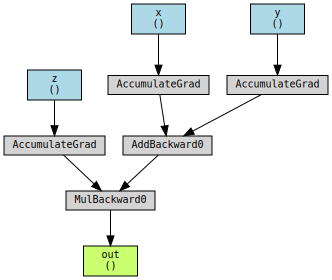

In [24]:
from torchviz import make_dot

dot = make_dot(out, params={'x': x, 'y':y, 'z':z, 'out':out})
dot


## Алгоритм градієнтного спуску

1. **Ініціалізація:**
  Виберіть початкове
  значення $x^{(0)}$.
2. **Ітерація:**
    * Розрахуйте градієнт $\nabla f(x^{(k)})$
      в поточній точці $x^{(k)}$.
    * Зробіть крок
      в **протилежному**
      до градієнта
      напрямку:
      
      $x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})$
      
      **Де:**
      
      * $\alpha$ - **швидкість**
        навчання
    * Повторіть
      кроки 2.1
      та 2.2
      до
      зближення
      з
      мінімумом.

![](https://ml-explained.com/articles/gradient-descent-explained/gradient_descent.gif)

![](https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif)

In [25]:
def f(x):  # функція для мінімізації
  return x**2 - 3*x + 4

In [49]:
from torch.optim import SGD

# підкоючаємо процесор
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# вибираємо початкове значення
x = torch.tensor(4.0, requires_grad=True, device=device)
# print(x)

# швидкість навчання
learning_rate = 1e-2

# визначення алгоритму
optimizer = SGD([x],  # список тензорів з градієнтом
                lr=learning_rate)

for t in range(200):  # 200 ітерацій
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 20 == 0:
        print(f"x={x}\tloss={loss}")

    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()

x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0
x=4.0	loss=8.0


In [33]:
x

tensor(1.5088, device='cuda:0', requires_grad=True)

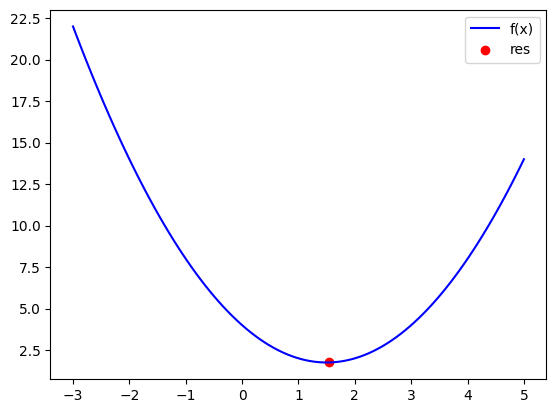

In [44]:
import matplotlib.pyplot as plt

x = x.cpu().detach()

xs = torch.linspace(-3, 5, 100)
y = f(xs)
plt.plot(xs, y, c='b', label='f(x)')
plt.scatter(x, f(x), c='r', label='res')
plt.legend()

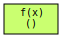

In [45]:
loss = f(x)

dot = make_dot(loss, params={'x': x, 'f(x)': loss})
dot

# Спуск з моментом(додатково)

In [ ]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [ ]:
# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-1

# ініціалізація моменту
moment = torch.tensor(0.0)
beta = 0.99

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'{loss.item()=}')

    # градієнтний спуск
    with torch.no_grad():
      moment = beta*moment + learning_rate*x.grad
      x -= moment

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None

In [ ]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

In [ ]:
# linear regression
# y_pred = coef*x + intercept